In [400]:
# Yale Quantum Institute Hackathon
# Date: June 2020
# Team: Quantum Hoppers
#
# Team Members:
# Paola
# Amy
# Nana
# Klaara
# Bruce

In [401]:
from qiskit import *

In [402]:
from qiskit.tools.visualization import plot_histogram

In [403]:
from qiskit.tools.monitor import job_monitor

In [404]:
import numpy

In [405]:
%matplotlib inline

In [ ]:
name = input("Enter Your Name:")

In [374]:
if name =="":
    name = "Marie"

In [375]:
# create binary version of name
ascii_name = bytes(name, "ascii")
#print(ascii_name, type(ascii_name))
ascii_name = ' '.join(["{0:b}".format(x) for x in ascii_name])
#print(type(ascii_name), ascii_name)

In [376]:
# QUANTUM CIRCUIT CREATION

In [377]:
# Create 7 circuits becuase each letter has 7 bits
my_quantum_circuit_quantity = 7
my_classical_circuit_quantity = 7

In [378]:
circuit = QuantumCircuit(my_quantum_circuit_quantity,my_classical_circuit_quantity)
#print("Created {} quantum circuits.".format(my_quantum_circuit_quantity))

In [379]:
letters_list = ascii_name.split()
print(letters_list)
# letters_list contains the binary representation of the person's name in a list
# So Marie is '1001101', '1100001', '1110010', '1101001', '1100101'

# take each letter and apply a gate to the quantum circuit based on the 0's and 1's that make up the letter  

for i in range(0, len(letters_list)):
    letters = letters_list[i]
    for j in range(0, len(letters)):
        # if there is a 1, put a pauli-x gate
        if int(letters[j])== 1 and i == 0 :
            circuit.x(j)
            
        # if there is a 1, put a hadamard
        if int(letters[j])== 1 and i == 1 :
            circuit.h(j)
            
        ## if there are two 1's in a row, put a controlled not gate
        if j < len(letters)-1 and int(letters[j])== 1 and int(letters[j+1])== 1 and i == 2 :
            circuit.cx(j,j+1)
        ## if there are two 0's in a row, put a controlled not gate    
        if j < len(letters)-1 and int(letters[j])== 0 and int(letters[j+1])== 0 and i == 2 :
            circuit.cx(j,j+1)
            
        ## if there are two 1's in a row, put U1  
        if j < len(letters)-1 and int(letters[j])== 1 and int(letters[j+1])== 1 and i == 3 :
            circuit.u1(j)
        ## if there are two 0's in a row, put U1  
        if j < len(letters)-1 and int(letters[j])== 0 and int(letters[j+1])== 0 and i == 3 :
            circuit.u1(j)
            
        ## if there are three 1's in a row, put U2  
        if j < len(letters)-2 and int(letters[j])== 1 and int(letters[j+1])== 1 and int(letters[j+2])== 1 and i == 4 :
            circuit.u2(j,j+1,j+2)
        ## if there are three 0's in a row, put U2      
        if j < len(letters)-2 and int(letters[j])== 0 and int(letters[j+1])== 0 and int(letters[j+2])== 0 and i == 4 :
            circuit.u2(j,j+1,j+2)
            
        ## if there are four 1's in a row, put U3    
        if j < len(letters)-3 and int(letters[j])== 1 and int(letters[j+1])== 1 and int(letters[j+2])== 1 and int(letters[j+3])== 1 and i == 5 :
            circuit.u3(j,j+1,j+2, j+3)
        ## if there are four 0's in a row, put U3    
        if j < len(letters)-3 and int(letters[j])== 0 and int(letters[j+1])== 0 and int(letters[j+2])== 0 and int(letters[j+3])== 0 and i == 5 :
            circuit.u3(j,j+1,j+2, j+3)    
            
        if int(letters[j])== 1 and i == 6 :
            circuit.id(j)
    circuit.barrier()

['1100010', '1110010', '1110101', '1100011', '1100101']


In [380]:
circuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])

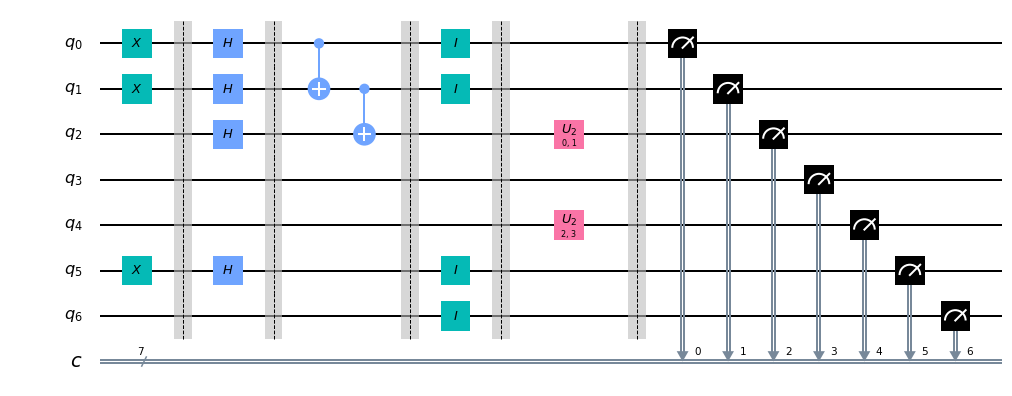

In [381]:
circuit.draw(output='mpl') 

In [382]:
# Preparing to send job to Quantum Computer

In [383]:
IBMQ.load_account()

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

In [384]:
provider = IBMQ.get_provider('ibm-q')

IBMQProviderError: 'No provider matches the specified criteria: hub = ibm-q, group = None, project = None'

In [385]:
#London is 5 qbits  - 8192 shots maximum.

In [386]:
#group = provider.get_backend('ibmq_london')

In [387]:
#Melbourne is 15 qbits  - 8192 shots maximum.

In [388]:
group = provider.get_backend('ibmq_16_melbourne')

NameError: name 'provider' is not defined

In [389]:
simulator = Aer.get_backend('qasm_simulator')

In [390]:
job = execute(circuit, backend = simulator, shots = 1024)

In [391]:
# uncomment this line to run on real quantum computer
# job = execute(circuit, backend = group, shots = 1024)

In [392]:
# show job monitor
job_monitor(job)

Job Status: job has successfully run


In [393]:
result = job.result()

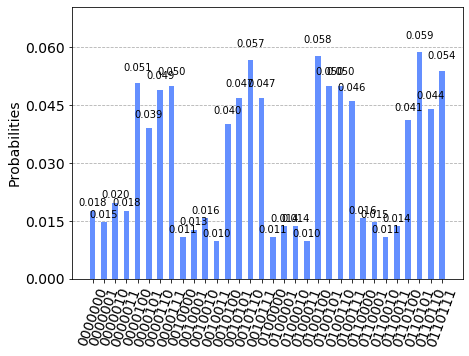

In [394]:
plot_histogram(result.get_counts(circuit))

In [395]:
import operator

counts = result.get_counts()

#final_state = numpy.zeros([1,7], dtype = float)
final_count = numpy.zeros(7, dtype = int)
my_count = 0

for key in counts:
    count = counts[key]
    for i in range(0,len(key)):
        if int(key[i]) == 1:
            final_count[i] = final_count[i] + counts[key]

final_state = final_count / 1024

In [396]:
final_state = final_count / 1024
print("Final  Count: ", final_count)
print("Final State: ", final_state)

Final  Count:  [  0 515 503   0 798 518 509]
Final State:  [0.         0.50292969 0.49121094 0.         0.77929688 0.50585938
 0.49707031]


In [397]:
# get the answer that occurred with the most probability
import operator
answer = max(counts.items(), key=operator.itemgetter(1))[0]

In [398]:
print("Thank you")

Thank you


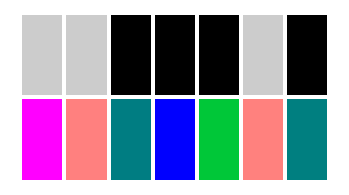

In [399]:
# Create a plot, where 7 binary numbers are represented as a color boxes.
import matplotlib.pyplot as plt
import math
import random

first_letter = letters_list[0]

ax = plt.gca()

for ii in range(0, 7):
    # Define state
    initial_state = int(first_letter[ii])
    #print(initial_state)
    ##print(type(final_state[ii]))
    p_one = final_state[ii]
    # print(p_one)
    p_zero = 1 - p_one
    # Define color according to the state
    color1 = initial_state
    color2 = p_one
    color3 = p_zero
    color_initial = [color1*0.8, color1*0.8, color1*0.8]
    color_final = [color1, color2, color3]
    # print("Color: ", color_initial)
    # Define rectangle
    rectangle_init = plt.Rectangle((ii*1.1, 5.1), width=1, height=2, facecolor=color_initial)
    rectangle_final = plt.Rectangle((ii*1.1, 3), width=1, height=2, facecolor=color_final)
    # Add rectangle to plot
    ax.add_patch(rectangle_init)
    ax.add_patch(rectangle_final)
    
# Create plot
plt.axis("scaled")
plt.axis("off")
plt.show()

# In the first row the inital state is represented with black for 0 and for grey is 1.
# In the second row the RGB value of the color for the final state is defined by the following: 
# R is defined by the initial state. 
# G is defined by the probability of having 1 as the final state. 
# B is defined by the probability of having 0 as the final state.